# **Analises de Dados - E-Disciplinas USP - Bolsa PUB 2020/2021**
Professor Orientador Ewout Ter Haar

Aluno Gustavo de Andrade - Nº USP: 8669592

Arquivo utilizado: **mc-2020-07-07.csv**

O objetivo dessa analise estende a compreensão do funcionamento por completo da ferramenta pedagógica E-Disciplinas, assim como acompanhar seu percurso aos longos dos anos de 2012 até 2020, englobando os fundamentos da Ciências de Dados utilizando a linguagem de programação Python e bibliotecas específicas para análises de dados, entre outras possíveis ferramentas. Assim, podendo estabelecer um padrão ou mesmo tendência para com a ferramenta E-disciplinas da Universidade de São Paulo interpretando sua importância no papel pedagógico em suas funcionalidades individuais e como um todo.

In [7]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

Após importar as bibliotecas utilizadas na análise, carregar o arquivo e efetuar a leitura das 3 primeiras linhas do arquivo **mc-2020-07-07.csv** para primeira visualização dos Dados:

In [11]:
dados = pd.read_csv('Gustavo/mc-2020-07-07.csv')
dados.head(3)

/opt/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,link,assign,attendance,bigbluebuttonbn,book,chat,choice,data,dialogue,...,vpl,offlinequiz,obs,poster,feedback,journal,checklist,pdfannotator,publication,studentquiz
0,5,https://edisciplinas.usp.br/course/view.php?id=5,3,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,https://edisciplinas.usp.br/course/view.php?id=6,5,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,85,https://edisciplinas.usp.br/course/view.php?id=85,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




*   Importando as 3 primeiras linhas já podemos visualizar nas colunas as variáveis cabíveis para cada ambiente do E-Disciplinas USP.

*   Buscando as informações da tabela, visualizamos a baixo as informações do arquivo, listando a ordem das colunas, o nome de cada coluna, o número de linhas por coluna e o tipo de dado de cada uma dessas colunas possuem. Por padrão ele tenta identificar o tipo de dado como int, float, datetime, ou object caso ele não consiga identificar o tipo exato. No final podemos observar a quantidade de memória utilizada para ler o arquivo.

In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28409 entries, 0 to 28408
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              28409 non-null  int64  
 1   link               28409 non-null  object 
 2   assign             28409 non-null  int64  
 3   attendance         28409 non-null  int64  
 4   bigbluebuttonbn    28409 non-null  int64  
 5   book               28409 non-null  int64  
 6   chat               28409 non-null  int64  
 7   choice             28409 non-null  int64  
 8   data               28409 non-null  int64  
 9   dialogue           28409 non-null  int64  
 10  folder             28409 non-null  int64  
 11  forum              28409 non-null  int64  
 12  glossary           28409 non-null  int64  
 13  imscp              28409 non-null  float64
 14  label              28409 non-null  int64  
 15  lesson             28409 non-null  int64  
 16  lti                284

Visualizando afim de compreender melhor só os nomes das colunas do arquivo, sendo que mais a frente nos especializaremos na função de cada coluna:

In [13]:
dados.columns

Index(['index', 'link', 'assign', 'attendance', 'bigbluebuttonbn', 'book',
       'chat', 'choice', 'data', 'dialogue', 'folder', 'forum', 'glossary',
       'imscp', 'label', 'lesson', 'lti', 'oublog', 'ouwiki', 'page',
       'questionnaire', 'quiz', 'recordingsbn', 'resource', 'scorm', 'survey',
       'url', 'wiki', 'workshop', 'sdi', 'Nunique', 'N', 'Nresource1',
       'Nresource2', 'Ncommunication', 'Nfeedback', 'Nassess', 'Nadmin',
       'fullname', 'shortname', 'idnumber', 'catname', 'unidade', 'ano', 'sem',
       'advancedteacher', 'editingteacher', 'manager', 'monitor', 'student',
       'studentcopy', 'teacher', 'nturmas', 'area', 'posgrad', 'coddis',
       'semestre', 'activequiz', 'assignment', 'hvp', 'simplecertificate',
       'videogallery', 'choicegroup', 'scheduler', 'vpl', 'offlinequiz', 'obs',
       'poster', 'feedback', 'journal', 'checklist', 'pdfannotator',
       'publication', 'studentquiz'],
      dtype='object')

In [14]:
dados.loc[[30], ['unidade','ano','fullname','area','link']]

,unidade,ano,fullname,area,link
30,EP,2012.0,Eletromagnetismo-2012,exatas,https://edisciplinas.usp.br/course/view.php?id=66


In [ ]:
n = int(input('Digite o número index de registro do ambiente que deseja visualizar até 31205: '))
dados.loc[[n], ['unidade','ano','fullname','area','link']]

In [9]:
dados.loc[31195:31205,['unidade','ano','fullname','area','link']]

,unidade,ano,fullname,area,link
31195,EP,2020,PEF3409 - Geotecnia e Recuperação Ambiental (2...,exatas,https://edisciplinas.usp.br/course/view.php?id...
31196,EP,2020,PEF3302 - Mecânica das Estruturas I (2020 -1o...,exatas,https://edisciplinas.usp.br/course/view.php?id...
31197,EP,2020,PEF3310 - Mecânica dos Solos e das Rochas II (...,exatas,https://edisciplinas.usp.br/course/view.php?id...
31198,EP,2020,"PEF3501 - Concepção, Projeto e Métodos Constru...",exatas,https://edisciplinas.usp.br/course/view.php?id...
31199,EP,2020,PEF5917 - Elementos de Mecânica dos Sólidos De...,exatas,https://edisciplinas.usp.br/course/view.php?id...
31200,EP,2020,PEF3202 - Introdução à Mecânica dos Sólidos (1...,exatas,https://edisciplinas.usp.br/course/view.php?id...
31201,EP,2020,PEF2603 - Estruturas na Arquitetura III: Siste...,exatas,https://edisciplinas.usp.br/course/view.php?id...
31202,EP,2020,PEF3307 - Resistência dos Materiais (2020),exatas,https://edisciplinas.usp.br/course/view.php?id...
31203,EP,2020,PEF3515 - O Método dos Elementos Finitos (2020),exatas,https://edisciplinas.usp.br/course/view.php?id...
31204,EP,2020,PEF5920 - Fundamentos do Concreto Estrutural (...,exatas,https://edisciplinas.usp.br/course/view.php?id...


In [ ]:
dados.query('ano > 15 | unidade=="IF" & area=="exatas"').head(3)

,index,link,assign,attendance,bigbluebuttonbn,book,chat,choice,data,dialogue,folder,forum,glossary,imscp,label,lesson,lti,oublog,ouwiki,page,questionnaire,quiz,recordingsbn,resource,scorm,survey,url,wiki,workshop,sdi,Nunique,N,Nresource1,Nresource2,Ncommunication,Nfeedback,Nassess,Nadmin,fullname,shortname,idnumber,catname,unidade,ano,sem,advancedteacher,editingteacher,manager,monitor,student,studentcopy,teacher,nturmas,area,posgrad,coddis,semestre,activequiz,assignment,hvp,simplecertificate,videogallery,choicegroup,scheduler,vpl,offlinequiz,obs,poster,feedback,journal,checklist,pdfannotator,publication,studentquiz
0,5,https://edisciplinas.usp.br/course/view.php?id=5,3,0,0,0,0,1,0,0,0,1,0,0.0,8,1,0.0,0,0,29,0,4,0.0,17,0.0,1,16,0,0,1.732052,10,81,41,29,1,2,8,0,Linguagens Documentárias I,CBD0274,"CBD0274.1.2012101,CBD0274.1.2012105",CBD,ECA,2012,1,0,1,0,6,30,0,0,2,humanas,GR,CBD0274,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,https://edisciplinas.usp.br/course/view.php?id=6,5,0,0,0,0,0,0,0,1,1,0,0.0,1,0,0.0,0,0,0,0,1,0.0,17,0.0,1,2,0,0,1.381154,8,29,21,0,1,1,6,0,Leitura Documentária,CBD0286,"CBD0286.1.2012101,CBD0286.1.2012105",CBD,ECA,2012,1,0,1,0,5,38,0,0,2,humanas,GR,CBD0286,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,85,https://edisciplinas.usp.br/course/view.php?id=85,2,0,0,0,0,0,0,0,0,2,0,0.0,0,0,0.0,0,0,0,0,0,0.0,78,0.0,0,0,0,0,0.228721,3,82,78,0,2,0,2,0,Metodologia da Pesquisa em Ciência da Informação,CBD5600,CBD5600.1.4,CBD,ECA,2012,1,0,3,0,0,45,0,0,1,humanas,POS,CBD5600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Algumas apresentações e leituras especifícas.

# **Quantos ambientes foram criado por ano?**

In [10]:
dados.groupby(by='ano').size()

ano
2012    1061
2013    1369
2014    2180
2015    2654
2016    4006
2017    4814
2018    5520
2019    6306
2020    5292
dtype: int64

Com a tabela acima e o gráfico abaixo visualizamos o cresimento explícito na utilização do E-Disciplinas, considerando que em 2020 só conta informações do primeiro semestre alcançando 3294 cursos. Ao executar todo código, será gerado novos gráficos e salvo ao lado do arquivo, no qual, esta referente a relação do crescimento da utilização separados por ano, criando um histograma e salvando com o nome "**graf0_ambientes_por_ano.png**"

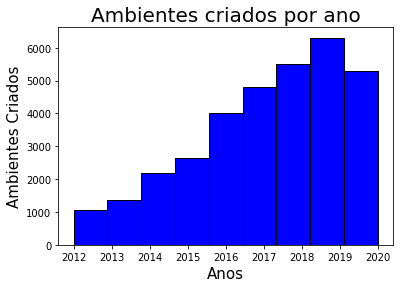

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.hist(dados['ano'], bins=9 , rwidth=1.9, color='blue', edgecolor='black')
plt.title('Ambientes criados por ano', fontsize=20)
plt.xlabel('Anos', fontsize=15)
plt.ylabel('Ambientes Criados', fontsize=15)
plt.tick_params(labelsize=10)
plt.show()
plt.savefig('graf0_ambientes_por_ano.png')

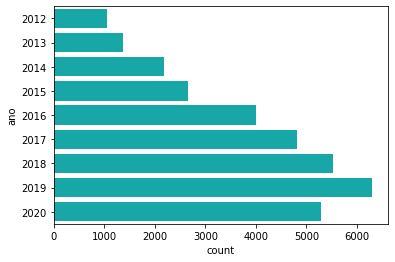

In [ ]:
sns.countplot( data=dados, y="ano", color="c")

**Utilizando a biblioteca Python Seaborn**

graf0_ambientes_por_unidades_e_por_ano.png

O total de ambiente criados por todas unidades da Unviersidade de Sãso Paulo é 31204 ambientes até o dia 07 de julho de 2020, que conforme o histograma, vem crescendo rápido a cada ano.

Um **ambiente do e-disciplinas** é o termo usado para o espaço da disciplina, e neste ambiente se aplica atividade, fornece materiais e informações, além de facilitar a comunicação entre os alunos, monitores e professores por meio de fórum e mensagens diretas. Com esses e muitos outros recursos, a demanda das diversas disciplinas espalhadas por todas as **unidades** da Universidade de São Paulo tem crescido, por isso essa organização e acompanhamento é fundamental, o que trás a necessidade da próxima pergunta.

# **Quantos ambientes por ano e por unidade?**
<br>
Salvei um arquivo em excel detalhando essa tabela no segundo código abaixo.

In [6]:
tabela1 = dados.groupby(by=['unidade','ano']).size()
print(tabela1)
tabela1.to_excel('tabela_ambientes_criados_por_unidade_e_por_ano.xlsx', sheet_name='Sheet1')

NameError: name 'dados' is not defined

Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib. Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.

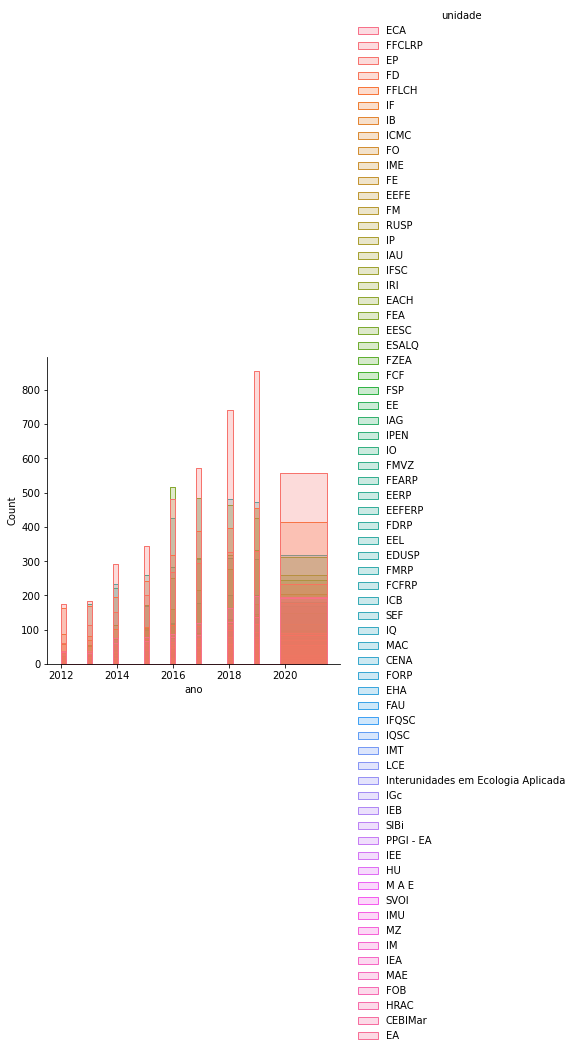

In [14]:
sns.displot(dados, x="ano", hue="unidade", element="step", shrink=9)
plt.savefig('graf_model1_ambientes_por_unidade_e_por_ano.png')

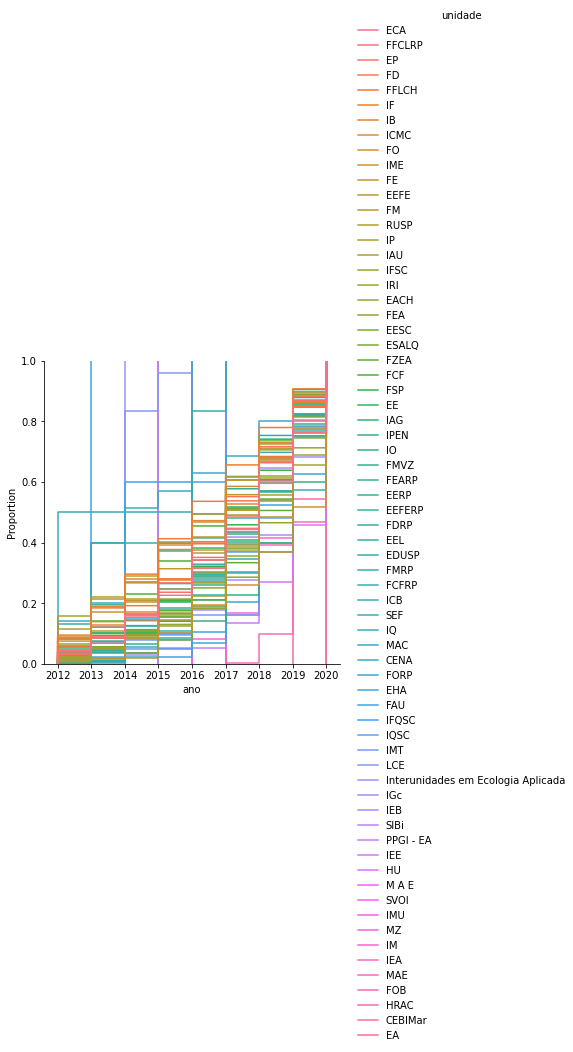

In [15]:
sns.displot(dados, x="ano", hue="unidade", kind="ecdf")
plt.savefig('graf_model2_proporcao_ambientes_por_unidade_e_por_ano.png')

/opt/miniconda3/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  

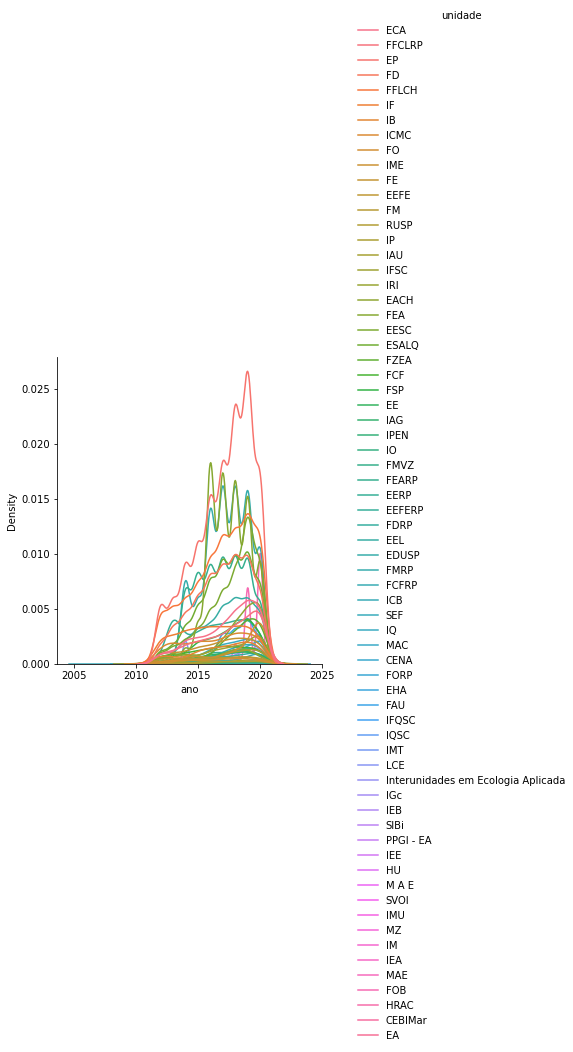

In [16]:
sns.displot(dados, x="ano", hue="unidade", kind="kde")
plt.savefig('graf_model3_densidade_ambientes_por_unidade_e_por_ano.png')

# Ambientes criados por unidades 
(de 2012 até o 1º semestre de 2020)<br>
68 unidades educacionais participantes da plataforma E-Disciplinas da Universidade de São Paulo até o ano de 2020.

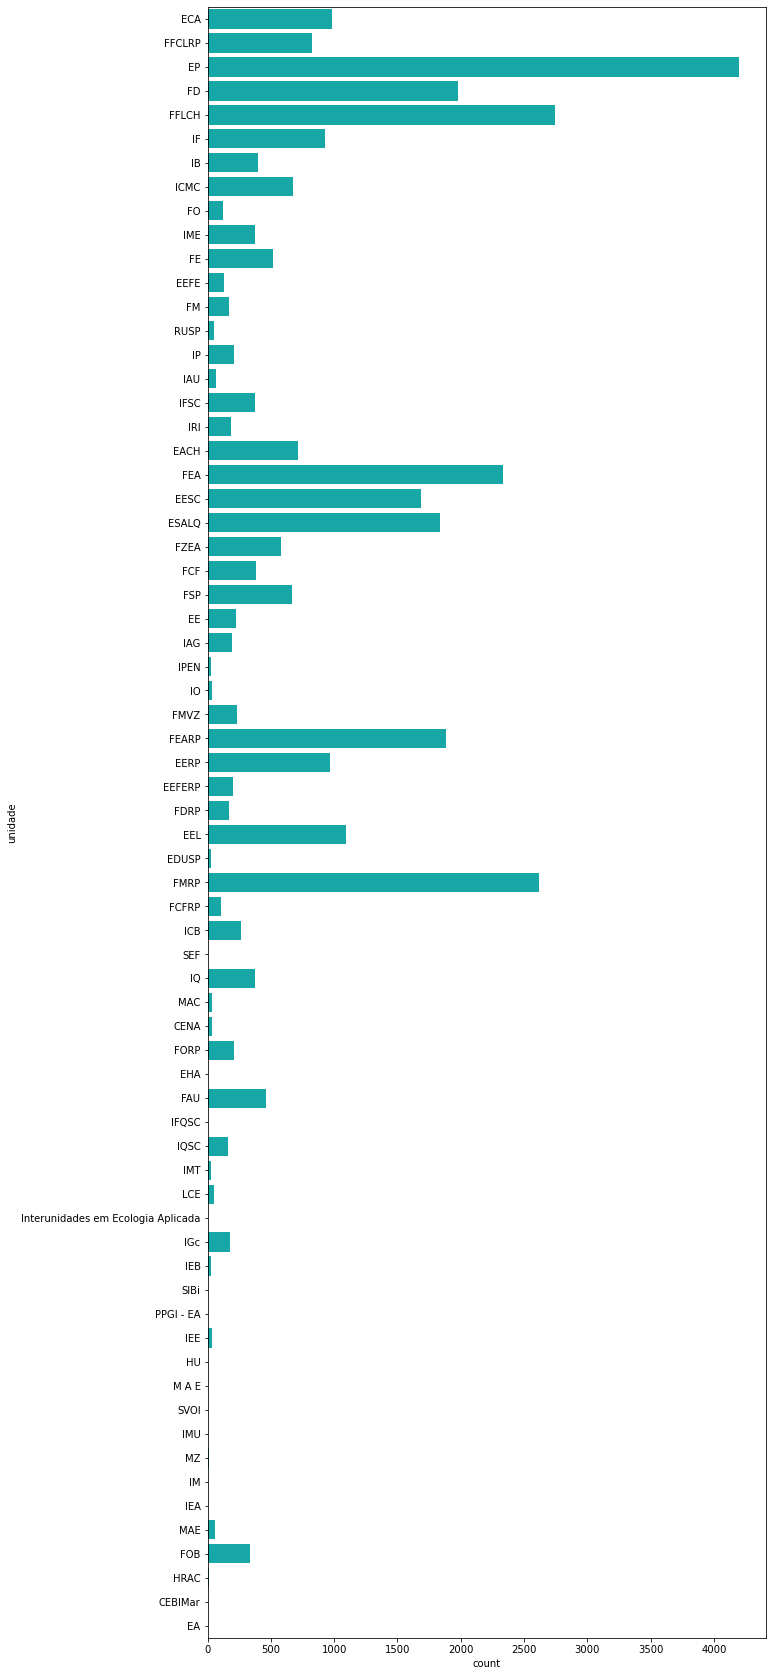

In [17]:
f, ax = plt.subplots(figsize=(10, 30))
sns.countplot( data=dados, y="unidade", color="c")
plt.savefig('graf_model1_ambientes_criados_por_unidade_total.png')

# **Ambientes criados por unidades e por ano**

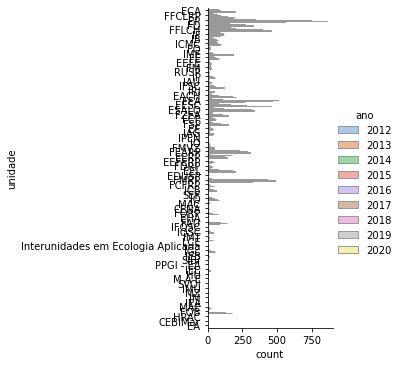

In [18]:
sns.catplot(y="unidade", hue="ano", kind="count",
            palette="pastel", edgecolor=".6",
            data=dados)
plt.savefig('graf_model1_ambientes_criados_por_unidade_e_por_ano.png')

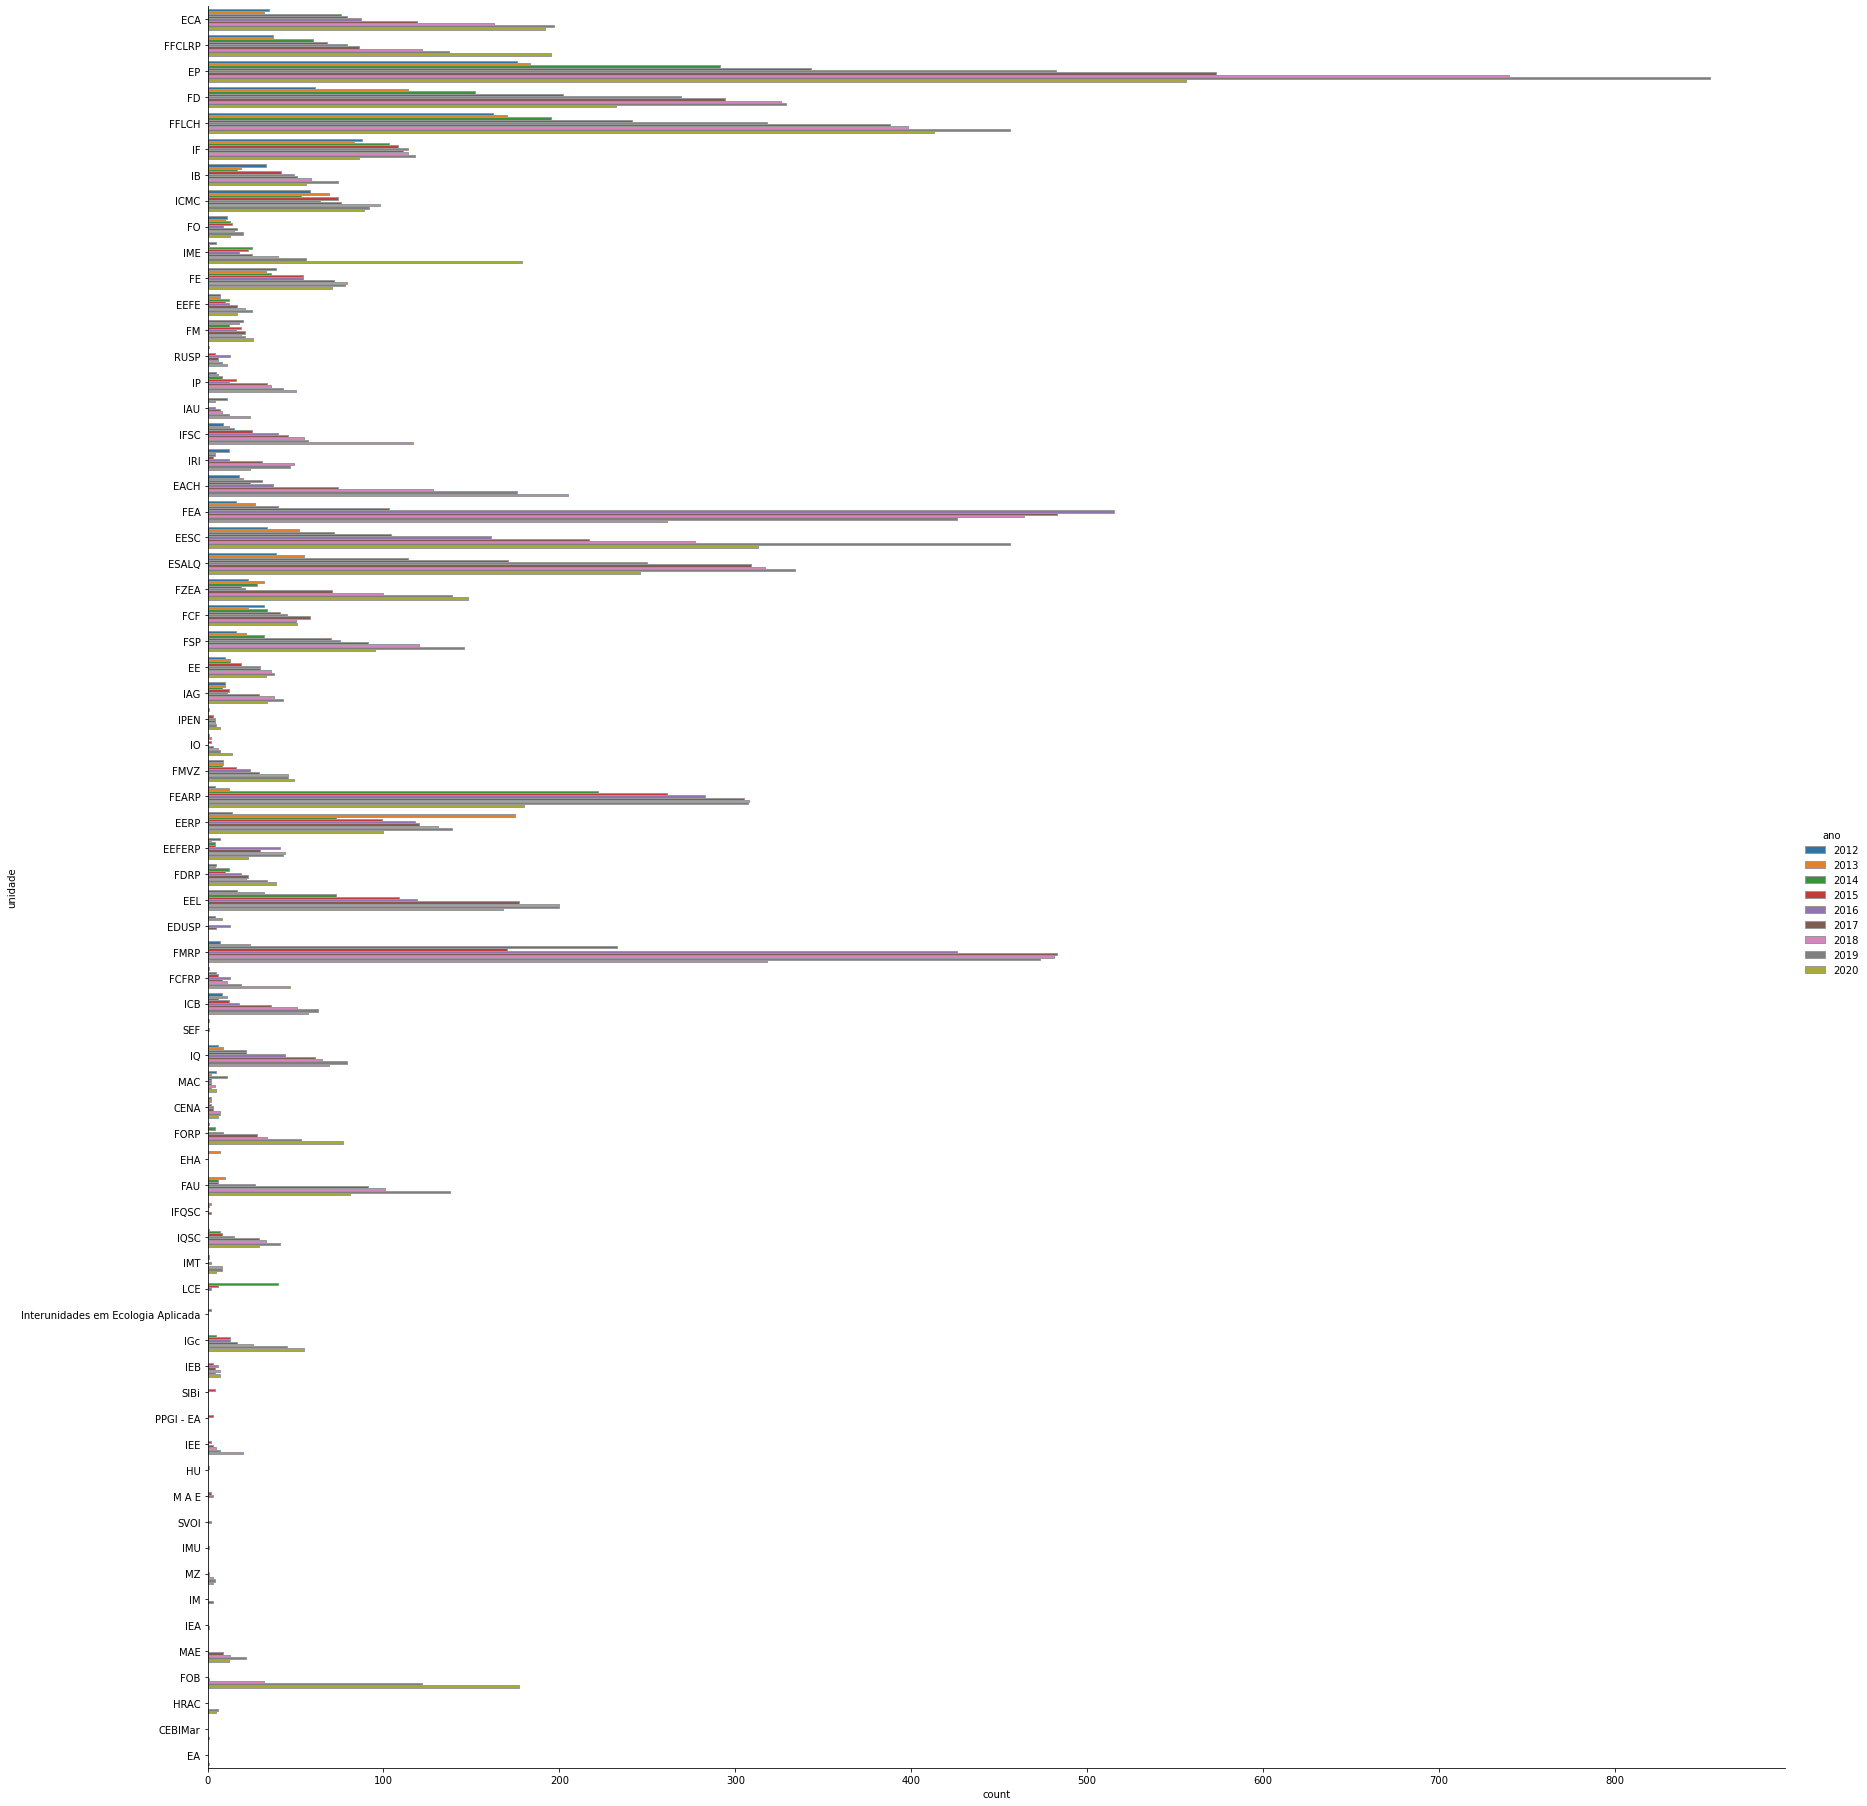

In [19]:
sns.catplot(y="unidade", hue="ano", kind="count",
            edgecolor=".6",
            data=dados, height=25)
plt.savefig('graf_model2_ambientes_criados_por_unidade_e_por_ano.png')

# **Quantos inscrições de estudantes por ano, por unidade?**

In [ ]:
dados.query('ano > 15 | unidade=="IF" & area=="exatas"').head(3)

In [21]:
dados.groupby(by=['unidade','student']).size()

unidade  student
CEBIMar  20         1
CENA     0          3
         2          1
         3          1
         8          1
                   ..
SIBi     0          2
         1          1
         3          1
SVOI     54         1
         80         1
Length: 5175, dtype: int64

In [24]:
tabela2 = dados.groupby(by=['student','unidade','ano']).size()
tabela2.to_excel('tabela1_estudantesmatriculados_por_unidade.xlsx', sheet_name='Sheet2')

ModuleNotFoundError: No module named 'openpyxl'

In [23]:
sns.catplot(x="student",y="unidade", hue="ano", kind="count",
            edgecolor=".6",
            data=dados, height=25)
plt.savefig('graf_model0_estudantes_matriculados_por_unidade_e_por_ano.png')

ValueError: Either `x` or `y` must be None for kind='count'

# **A distribuição (histograma) do número de atividades e recursos (N) usados**
<br>
Ou seja, eixo-x = N (dividido em bins), eixo-y = número de ambientes.

# **Distribuição de N,  mas por ano, para ver se algo mudou.**